# __Predict Customer Clicked Ads Classification__

## Importing Necessary Libraries and Dataset

Reference: https://www.kaggle.com/code/mafrojaakter/customer-ad-click-prediction

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head() 

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [5]:
# drop kolom Unnamed 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Handling Missing Value

In [6]:
df[['Daily Time Spent on Site']]= df[['Daily Time Spent on Site']].fillna(df['Daily Time Spent on Site'].mean())
df[['Area Income']]= df[['Area Income']].fillna(df['Area Income'].mean())
df[['Daily Internet Usage']]= df[['Daily Internet Usage']].fillna(df['Daily Internet Usage'].mean())
df[['Male']]= df[['Male']].fillna('Laki-Laki')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [8]:
# Let's look at stats of the non-object features
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.741268,8.785562,9.346585e+07,43.627946
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.545000,29.000000,3.298201e+08,139.017500
50%,67.780000,35.000000,3.975088e+08,181.065000
75%,78.352500,42.000000,4.566932e+08,218.287500
max,91.430000,61.000000,5.563936e+08,267.010000


Let's go over each of the non-object features one by one:

- Daily Time Spent on Site: We see users spend between 32 min to 91 min on the site with a mean value of 65min, which is quite a large amount of time. This indicates that it is a popular site. We would like to see if there is any corellation with time spend on the site and 'clicked on Ad'.

- Age: The user age ranges from 19years to 61 years with a mean of 36 years, which tells us that the target users are adults.

- Area Income: The minimum users income is around 97k and the maximum user income is 556k, which tells us that the users belongs to different social classes. We would like to further investigate how the income is corelates with the click on the ad.

- Daily Internet Usage: The daily internet use ranges from 104min to 267min. Out of total daily internet use, users spend quite a large amount of time on the site, which ranges from 32 to 91 min. We will check if they both are relates to each other in some way.


In [9]:
# df[kat].describe()

- Male: We see users dominant on the site is Woman
- city: the most people who visite site are come from Surabaya
- province: the most visitor come from DKI Jakarta
- category: there are 10 unique category, and Otomotif is the most visitor find in this site 

## Univariate Analysis

umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak

In [10]:
#membagi data dalam numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

In [11]:
num

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

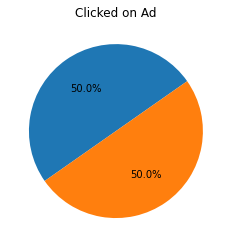

In [12]:
#menemukan masalah utama yaitu tingkat attrition
plt.pie(df['Clicked on Ad'].value_counts(), autopct='%1.1f%%',  startangle=35)
plt.title('Clicked on Ad')
plt.show()

### Numerical Features

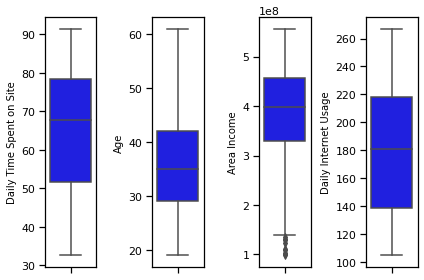

In [13]:
# Box Plot
num = num
for i in range (0, len(num)):
    plt.subplot(1,len(num), i+1)
    sns.boxplot(y=df[num[i]], color= 'blue', orient='v')
    plt.tight_layout()

data yang kita miliki tidak memiliki outlier, namun tidak memiliki distribusi normal

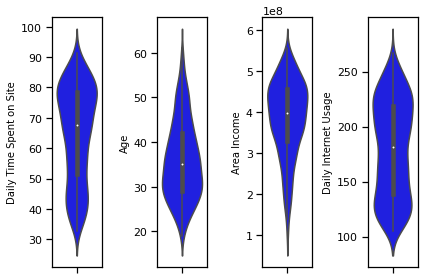

In [14]:
# Violin plot
for i in range(0,len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]],color='blue')
    plt.tight_layout()

- pada feature daily time spent on site, distribusi bimodal sedikit positive skewed
- feature Age berdistribusi negatif skewed, yang berarti mode/ data terbanyak berada dibawah rata-rata
- feature area income berdistribusi positif skewed yang artinya data mode berada diatas nilai mean/rat-rata
- sedangkan daily internet usage memiliki distribusi bimodal, yang artinya terdapat 2 kelompok nilai yang memiliki jumlah yang hampir sama

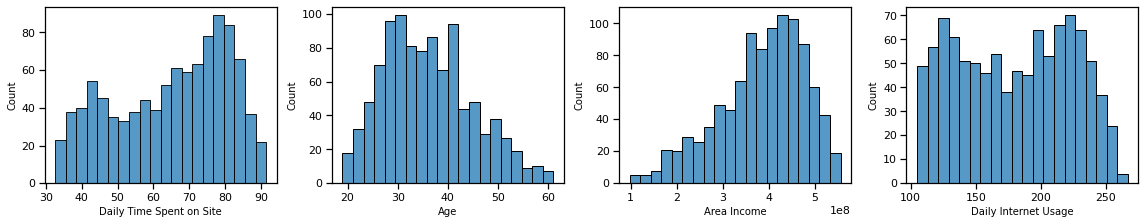

In [15]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(5,5,i+1)
        sns.histplot(x=df[j], bins=20)
        plt.tight_layout()

- waktu yang dihabiskan dalam berkunjung relatif lama
- rentang umur 26-42 merupakan pengunjung terbanyak pada situs
- area income pengunjung terbanyak berada di level 400k
- daily internet usage relatif bervariasi

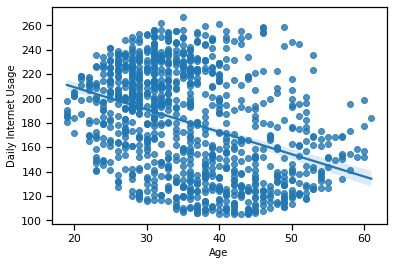

In [16]:
sns.regplot(x='Age', y='Daily Internet Usage', data=df)
plt.xlabel('Age')
plt.ylabel('Daily Internet Usage')
plt.show()

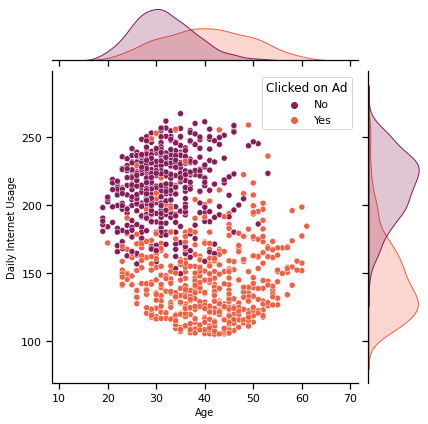

In [17]:
sns.jointplot(x='Age',y='Daily Internet Usage', data=df, hue="Clicked on Ad", palette='rocket')

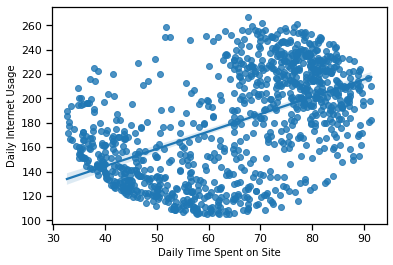

In [18]:
sns.regplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.show()

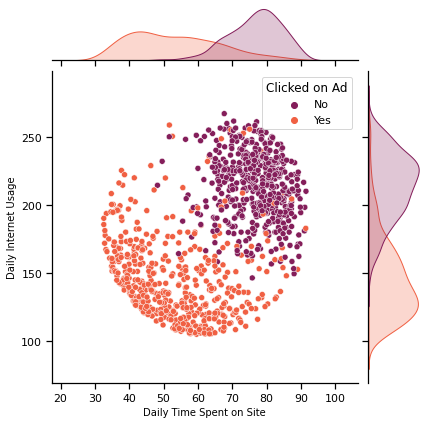

In [19]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage', data=df, hue="Clicked on Ad", palette='rocket')

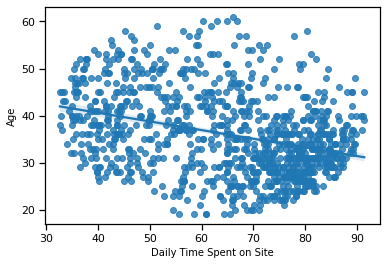

In [20]:
sns.regplot(x='Daily Time Spent on Site', y='Age', data=df)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Age')
plt.show()

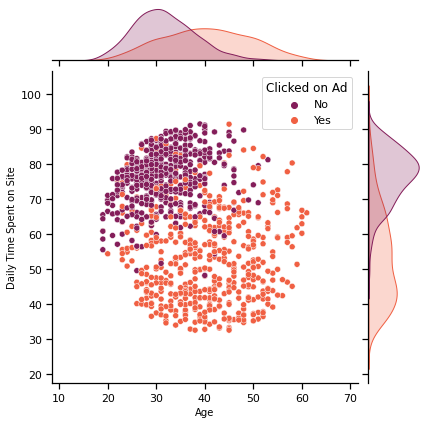

In [21]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=df, hue="Clicked on Ad", palette='rocket')

## Multivariate Analysis

<Axes: >

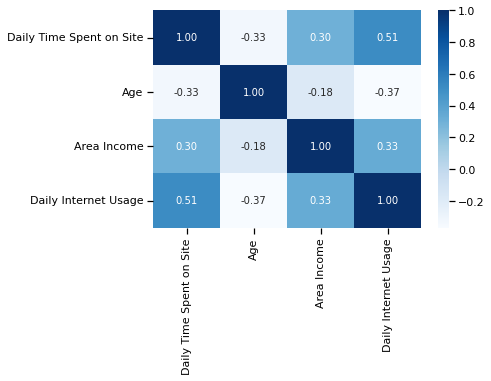

In [22]:
sns.heatmap(df.corr(),cmap='Blues', annot=True, fmt='.2f')

- Tidak ada feature yang memiliki korelasi >0.7 antar feature lainnya, 
- `age` memiliki korelasi negatif dengan `daily time spent on site`, yang artinya semakin tua pengguna semakin sedikit waktu yang dihabiskan di dalam site

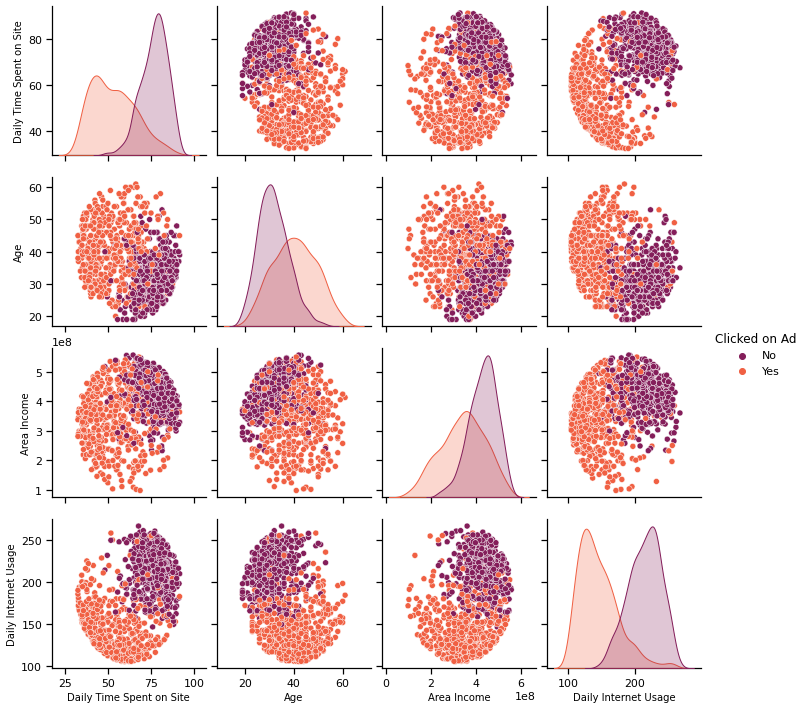

In [23]:
sns.pairplot(df, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 
                                            'Age',
                                           'Area Income',
                                           'Daily Internet Usage'], palette='rocket')

- user dengan waktu kunjung lebih lama relatif tidak mengklik iklan, sebaliknya, pengjunjung yang relatif lebih sebentar berada di sites lebih sering mengklik iklan
- pengunjung yang lebih tua lebih sering mengklik iklan dibandingkan dengan pengunjung tang lebih muda
- user dengan income yang lebih besar relatif tidak mengklik iklan
- user yang memiliki waktu lebih lama di internet tidak mengklik iklan, sebaliknya untuk user yang mengklik iklan memiliki waktu berselancar yang lebih rendah

## DATA CLEANING

### 1. Duplicated Data

In [24]:
df.duplicated().any()

False

No duplicated value in this dtaset, now we want to find missing value

### 2. Missing Value

In [25]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

No Missing value in this dataset, so we will move to the next stage

### 3. Date Extraction

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [27]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour



In [28]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [29]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Month,Day,Weekday,Hour
0,68.95,35,432837300.0,256.09,Perempuan,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,6,0
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Denpasar,Bali,Food,4,4,0,1
2,69.47,26,418501580.0,236.50,Perempuan,No,Surabaya,Jawa Timur,Electronic,3,13,6,20
3,74.15,29,383643260.0,245.89,Laki-Laki,No,Batam,Kepulauan Riau,House,1,10,6,2
4,68.37,35,517229930.0,225.58,Perempuan,No,Medan,Sumatra Utara,Finance,6,3,4,3


<Axes: >

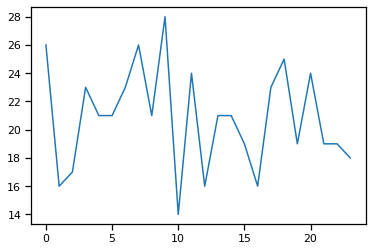

In [30]:
df['Hour'][df['Clicked on Ad'] == 'Yes'].value_counts().sort_index().plot()

<Axes: >

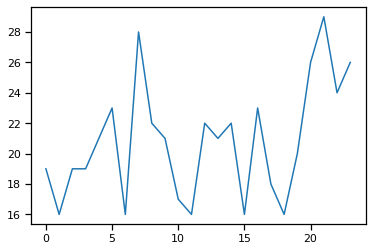

In [31]:
df['Hour'][df['Clicked on Ad'] == 'No'].value_counts().sort_index().plot()

### 4. Feature Encoding

Devided feature and Target

In [32]:
df_ex = df.copy()

`Clicked on Ad` is our Target, so the rest are Feature. we will drop our target from feature column

In [33]:
df_ex.drop(['Clicked on Ad'], axis=1, inplace=True)

Categorical data will encode with OneHot Encoding

In [34]:
categorical_cols = [col for col in df_ex.select_dtypes(include='object').columns.tolist()]

In [35]:
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

In [36]:
onehot_target = pd.get_dummies(df['Clicked on Ad'], drop_first=True)

In [37]:
onehot.head()

,Male_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,...,province_Sumatra Utara,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


## There will be 2 types treatment, data will be normalized and not normalized

### a. Normalized

In [38]:
df_norm = df_ex.copy()

In [39]:
from scipy.stats import shapiro

for i in df_norm.select_dtypes('number'):
        if shapiro(df[i])[1]<0.05:  #signifikansi alpha 5%
                print(i, "Tidak normal")
        else:
                print(i,'Normal')


Daily Time Spent on Site Tidak normal
Age Tidak normal
Area Income Tidak normal
Daily Internet Usage Tidak normal
Month Tidak normal
Day Tidak normal
Weekday Tidak normal
Hour Tidak normal


In [40]:
from sklearn.preprocessing import MinMaxScaler

for i in df_norm.select_dtypes('number'):
        df_norm[i] = MinMaxScaler().fit_transform(df[[i]])

In [41]:
df_norm.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Month,Day,Weekday,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.549541,0.404976,0.625824,0.462822,0.469500,0.482800,0.510667,0.506957
std,0.267572,0.209180,0.203888,0.268927,0.321162,0.291136,0.333079,0.302650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.322030,0.238095,0.505749,0.211043,0.166667,0.233333,0.166667,0.260870
50%,0.597994,0.380952,0.653406,0.470227,0.500000,0.466667,0.500000,0.521739
75%,0.777707,0.547619,0.782512,0.699670,0.666667,0.733333,0.833333,0.782609
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
numerical_columns= [col for col in df_norm.columns.tolist() if col not in categorical_cols]
norm_num = pd.DataFrame((df_norm[numerical_columns]), columns=numerical_columns)

### b. Standardization

In [43]:
numerical_cols = [col for col in df_ex.columns.tolist() if col not in categorical_cols+['Month']+['Day']+['Weekday']+['Hour']]

In [44]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [45]:
std.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.255538,-0.114905,0.513521,1.748066
1,0.972484,-0.570425,1.008662,0.318909
2,0.288588,-1.139826,0.360065,1.298817
3,0.586045,-0.798185,-0.013075,1.514154
4,0.218673,-0.114905,1.416897,1.048394


### Model Standarization

In [46]:
data_model = pd.concat([onehot, std, df[['Month']],df[['Day']], df[['Weekday']],df[['Hour']], onehot_target], axis=1)

In [47]:
data_model.head()

,Male_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,...,category_Travel,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Month,Day,Weekday,Hour,Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0.255538,-0.114905,0.513521,1.748066,3,27,6,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0.972484,-0.570425,1.008662,0.318909,4,4,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0.288588,-1.139826,0.360065,1.298817,3,13,6,20,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0.586045,-0.798185,-0.013075,1.514154,1,10,6,2,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0.218673,-0.114905,1.416897,1.048394,6,3,4,3,0


### Model Normalization

In [48]:
data_model_01 = pd.concat([onehot, norm_num, onehot_target], axis=1)

In [49]:
data_model_01.head()

,Male_Perempuan,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,...,category_Travel,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Month,Day,Weekday,Hour,Yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0.617882,0.380952,0.730472,0.932688,0.333333,0.866667,1.000000,0.000000,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0.809621,0.285714,0.831375,0.548542,0.500000,0.100000,0.000000,0.043478,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0.626721,0.166667,0.699200,0.811934,0.333333,0.400000,1.000000,0.869565,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0.706272,0.238095,0.623160,0.869814,0.000000,0.300000,1.000000,0.086957,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0.608023,0.380952,0.914568,0.744622,0.833333,0.066667,0.666667,0.130435,0


In [50]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Male_Perempuan                          1000 non-null   uint8  
 1   city_Bandar Lampung                     1000 non-null   uint8  
 2   city_Bandung                            1000 non-null   uint8  
 3   city_Banjarmasin                        1000 non-null   uint8  
 4   city_Batam                              1000 non-null   uint8  
 5   city_Bekasi                             1000 non-null   uint8  
 6   city_Bogor                              1000 non-null   uint8  
 7   city_Cimahi                             1000 non-null   uint8  
 8   city_Denpasar                           1000 non-null   uint8  
 9   city_Depok                              1000 non-null   uint8  
 10  city_Jakarta Barat                      1000 non-null   uint8

## __MODELLING STANDARDIZATION__

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)

        print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
        print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
        print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
        print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

        print("\nroc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
        print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

        score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
        print('\nroc_auc (crossval train): '+ str(round(score['train_score'].mean(),2)))
        print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(),2)))

def show_feature_importance(model):
        feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x.columns)
        ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
        ax.invert_yaxis()

        plt.xlabel('score')
        plt.ylabel('feature')
        plt.title('feature importance score')

model,accuracy,precision,recall,f1,auc,status=[],[],[],[],[],[],[]

### a. Splitting Standarization Data 

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = data_model.drop('Yes', axis=1)
y = data_model['Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
X_train.shape, X_test.shape

((700, 62), (300, 62))

### Data Training

#### 1. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [57]:
eval_classification(rfc)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.94
Recall (Test Set): 0.95
F1-Score (Test Set): 0.94

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98

roc_auc (crossval train): 0.99
roc_auc (crossval test): 0.99


In [58]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
57,Daily Internet Usage,0.360120
54,Daily Time Spent on Site,0.239025
55,Age,0.138581
56,Area Income,0.119446
59,Day,0.014096
...,...,...
30,province_Banten,0.000205
20,city_Palembang,0.000193
43,province_Sumatra Selatan,0.000133
21,city_Pontianak,0.000028


In [59]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

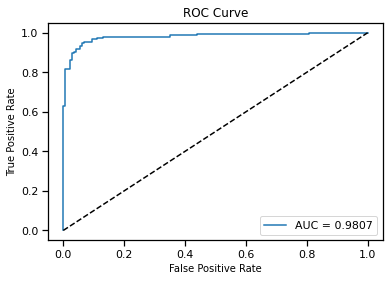

In [61]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### 1.b Kolmogorov Smirnov 

In [62]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [63]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,331,0,0.162372,1,0,1,0.003333,0.0,0.006849
1,946,0,0.175344,2,0,2,0.006667,0.0,0.013699
2,826,0,0.175425,3,0,3,0.010000,0.0,0.020548
3,359,0,0.180051,4,0,4,0.013333,0.0,0.027397
4,542,0,0.183808,5,0,5,0.016667,0.0,0.034247


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.8864')

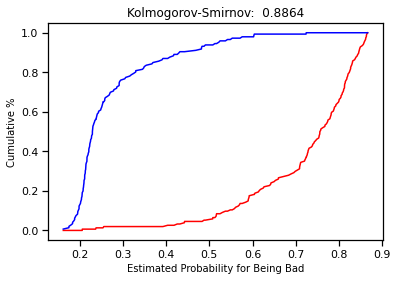

In [64]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

#### 2. Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=110)
lr.fit(X_train, y_train)

eval_classification(lr)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.99


2.a. ROC Curve

In [66]:
y_pred_proba_lr = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted_lr = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_lr, columns=['y_pred_proba_lr'])], axis=1)
df_actual_predicted_lr.index = y_test.index

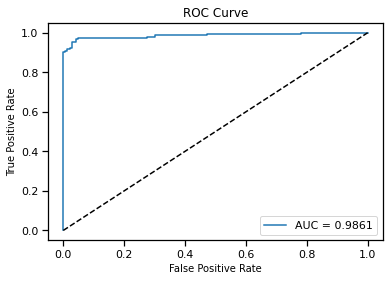

In [67]:
fpr, tpr, tr = roc_curve(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba_lr'])
auc = roc_auc_score(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba_lr'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

2.b. Kolmogorov Smirnov

In [68]:
df_actual_predicted_lr = df_actual_predicted_lr.sort_values('y_pred_proba_lr')
df_actual_predicted_lr = df_actual_predicted_lr.reset_index()

df_actual_predicted_lr['Cumulative N Population'] = df_actual_predicted_lr.index + 1
df_actual_predicted_lr['Cumulative N Bad'] = df_actual_predicted_lr['y_actual'].cumsum()
df_actual_predicted_lr['Cumulative N Good'] = df_actual_predicted_lr['Cumulative N Population'] - df_actual_predicted_lr['Cumulative N Bad']
df_actual_predicted_lr['Cumulative Perc Population'] = df_actual_predicted_lr['Cumulative N Population'] / df_actual_predicted_lr.shape[0]
df_actual_predicted_lr['Cumulative Perc Bad'] = df_actual_predicted_lr['Cumulative N Bad'] / df_actual_predicted_lr['y_actual'].sum()
df_actual_predicted_lr['Cumulative Perc Good'] = df_actual_predicted_lr['Cumulative N Good'] / (df_actual_predicted_lr.shape[0] - df_actual_predicted_lr['y_actual'].sum())

In [69]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,331,0,0.162372,1,0,1,0.003333,0.0,0.006849
1,946,0,0.175344,2,0,2,0.006667,0.0,0.013699
2,826,0,0.175425,3,0,3,0.010000,0.0,0.020548
3,359,0,0.180051,4,0,4,0.013333,0.0,0.027397
4,542,0,0.183808,5,0,5,0.016667,0.0,0.034247


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.9271')

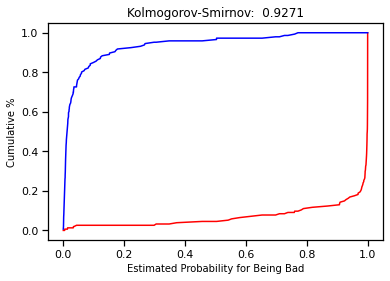

In [70]:
KS = max(df_actual_predicted_lr['Cumulative Perc Good'] - df_actual_predicted_lr['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_lr['y_pred_proba_lr'], df_actual_predicted_lr['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_lr['y_pred_proba_lr'], df_actual_predicted_lr['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

#### 3. ADA Boost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

eval_classification(ada)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.98


In [72]:
y_pred_proba_ada = ada.predict_proba(X_test)[:][:,1]

df_actual_predicted_ada = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_ada, columns=['y_pred_proba_ada'])], axis=1)
df_actual_predicted_ada.index = y_test.index

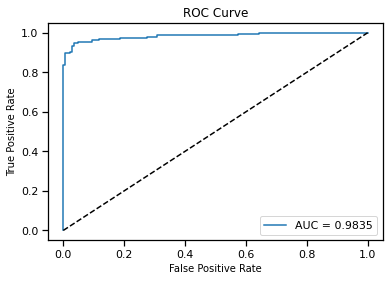

In [73]:
fpr, tpr, tr = roc_curve(df_actual_predicted_ada['y_actual'], df_actual_predicted_ada['y_pred_proba_ada'])
auc = roc_auc_score(df_actual_predicted_ada['y_actual'], df_actual_predicted_ada['y_pred_proba_ada'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [74]:
df_actual_predicted_ada = df_actual_predicted_ada.sort_values('y_pred_proba_ada')
df_actual_predicted_ada = df_actual_predicted_ada.reset_index()

df_actual_predicted_ada['Cumulative N Population'] = df_actual_predicted_ada.index + 1
df_actual_predicted_ada['Cumulative N Bad'] = df_actual_predicted_ada['y_actual'].cumsum()
df_actual_predicted_ada['Cumulative N Good'] = df_actual_predicted_ada['Cumulative N Population'] - df_actual_predicted_ada['Cumulative N Bad']
df_actual_predicted_ada['Cumulative Perc Population'] = df_actual_predicted_ada['Cumulative N Population'] / df_actual_predicted_ada.shape[0]
df_actual_predicted_ada['Cumulative Perc Bad'] = df_actual_predicted_ada['Cumulative N Bad'] / df_actual_predicted_ada['y_actual'].sum()
df_actual_predicted_ada['Cumulative Perc Good'] = df_actual_predicted_ada['Cumulative N Good'] / (df_actual_predicted_ada.shape[0] - df_actual_predicted_ada['y_actual'].sum())

In [75]:
df_actual_predicted_ada.head()

,index,y_actual,y_pred_proba_ada,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,868,0,0.419000,1,0,1,0.003333,0.0,0.006849
1,331,0,0.421029,2,0,2,0.006667,0.0,0.013699
2,155,0,0.422257,3,0,3,0.010000,0.0,0.020548
3,799,0,0.429662,4,0,4,0.013333,0.0,0.027397
4,23,0,0.429683,5,0,5,0.016667,0.0,0.034247


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.9138')

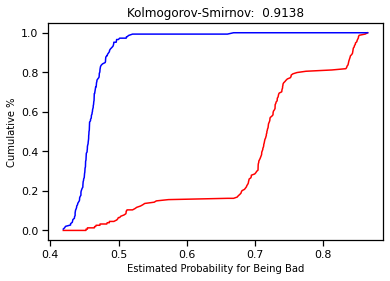

In [76]:
KS = max(df_actual_predicted_ada['Cumulative Perc Good'] - df_actual_predicted_ada['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_ada['y_pred_proba_ada'], df_actual_predicted_ada['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_ada['y_pred_proba_ada'], df_actual_predicted_ada['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

## __MODELING NORMALIZATION__

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
        y_pred1 = model.predict(X_test1)
        y_pred_train1 = model.predict(X_train1)
        y_pred_proba1 = model.predict_proba(X_test1)
        y_pred_proba_train1 = model.predict_proba(X_train1)

        print("Accuracy (Test Set): %.2f" % accuracy_score(y_test1, y_pred1))
        print("Precision (Test Set): %.2f" % precision_score(y_test1, y_pred1))
        print("Recall (Test Set): %.2f" % recall_score(y_test1, y_pred1))
        print("F1-Score (Test Set): %.2f" % f1_score(y_test1, y_pred1))

        print("\nroc_auc (train-proba): %.2f" % roc_auc_score(y_train1, y_pred_proba_train1[:, 1]))
        print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test1, y_pred_proba1[:, 1]))

        score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
        print('\nroc_auc (crossval train): '+ str(round(score['train_score'].mean(),2)))
        print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(),2)))

def show_feature_importance(model):
        feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x.columns)
        ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
        ax.invert_yaxis()

        plt.xlabel('score')
        plt.ylabel('feature')
        plt.title('feature importance score')

model,accuracy,precision,recall,f1,auc,status=[],[],[],[],[],[],[]

## b. Splitting Normalization Data 

In [78]:
X = data_model_01.drop('Yes', axis=1)
y = data_model_01['Yes']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
X_train1.shape, X_test1.shape

((700, 62), (300, 62))

#### 1. Random Forest

In [80]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=4)

In [81]:
eval_classification(rfc)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.95
Recall (Test Set): 0.92
F1-Score (Test Set): 0.93

roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.98

roc_auc (crossval train): 0.99
roc_auc (crossval test): 0.99


In [82]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train1.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
57,Daily Internet Usage,0.369085
55,Age,0.198453
54,Daily Time Spent on Site,0.161969
56,Area Income,0.138559
59,Day,0.015613
...,...,...
35,province_Kalimantan Barat,0.000151
25,city_Surabaya,0.000135
26,city_Surakarta,0.000109
16,city_Malang,0.000081


In [83]:
y_pred_proba = rfc.predict_proba(X_test1)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test1), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test1.index

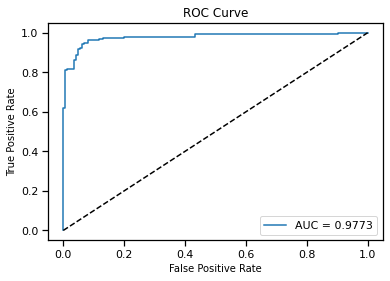

In [84]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### 2. Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=110)
lr.fit(X_train1, y_train1)

eval_classification(lr)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95

roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.99

roc_auc (crossval train): 0.99
roc_auc (crossval test): 0.99


In [86]:
y_pred_proba_lr = lr.predict_proba(X_test1)[:][:,1]

df_actual_predicted_lr = pd.concat([pd.DataFrame(np.array(y_test1), columns=['y_actual']), pd.DataFrame(y_pred_proba_lr, columns=['y_pred_proba_lr'])], axis=1)
df_actual_predicted_lr.index = y_test1.index

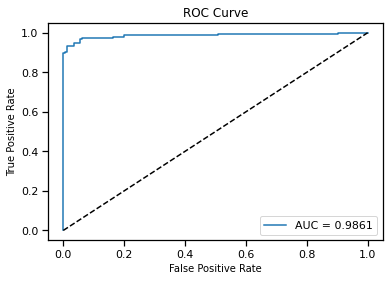

In [87]:
fpr, tpr, tr = roc_curve(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba_lr'])
auc = roc_auc_score(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba_lr'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### 3. ADA Boost

In [88]:
ada = AdaBoostClassifier()
ada.fit(X_train1, y_train1)

eval_classification(ada)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.94
F1-Score (Test Set): 0.95

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.98


In [89]:
y_pred_proba_ada = ada.predict_proba(X_test1)[:][:,1]

df_actual_predicted_ada = pd.concat([pd.DataFrame(np.array(y_test1), columns=['y_actual']), pd.DataFrame(y_pred_proba_ada, columns=['y_pred_proba_ada'])], axis=1)
df_actual_predicted_ada.index = y_test1.index

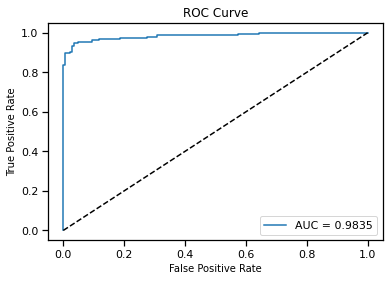

In [90]:
fpr, tpr, tr = roc_curve(df_actual_predicted_ada['y_actual'], df_actual_predicted_ada['y_pred_proba_ada'])
auc = roc_auc_score(df_actual_predicted_ada['y_actual'], df_actual_predicted_ada['y_pred_proba_ada'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [91]:
df_actual_predicted_ada = df_actual_predicted_ada.sort_values('y_pred_proba_ada')
df_actual_predicted_ada = df_actual_predicted_ada.reset_index()

df_actual_predicted_ada['Cumulative N Population'] = df_actual_predicted_ada.index + 1
df_actual_predicted_ada['Cumulative N Bad'] = df_actual_predicted_ada['y_actual'].cumsum()
df_actual_predicted_ada['Cumulative N Good'] = df_actual_predicted_ada['Cumulative N Population'] - df_actual_predicted_ada['Cumulative N Bad']
df_actual_predicted_ada['Cumulative Perc Population'] = df_actual_predicted_ada['Cumulative N Population'] / df_actual_predicted_ada.shape[0]
df_actual_predicted_ada['Cumulative Perc Bad'] = df_actual_predicted_ada['Cumulative N Bad'] / df_actual_predicted_ada['y_actual'].sum()
df_actual_predicted_ada['Cumulative Perc Good'] = df_actual_predicted_ada['Cumulative N Good'] / (df_actual_predicted_ada.shape[0] - df_actual_predicted_ada['y_actual'].sum())

In [92]:
df_actual_predicted_ada.head()

,index,y_actual,y_pred_proba_ada,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,868,0,0.419000,1,0,1,0.003333,0.0,0.006849
1,331,0,0.421029,2,0,2,0.006667,0.0,0.013699
2,155,0,0.422257,3,0,3,0.010000,0.0,0.020548
3,799,0,0.429662,4,0,4,0.013333,0.0,0.027397
4,23,0,0.429683,5,0,5,0.016667,0.0,0.034247


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.9138')

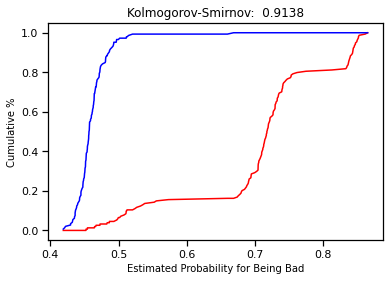

In [93]:
KS = max(df_actual_predicted_ada['Cumulative Perc Good'] - df_actual_predicted_ada['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_ada['y_pred_proba_ada'], df_actual_predicted_ada['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_ada['y_pred_proba_ada'], df_actual_predicted_ada['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

### CONFUSION MATRIX

#### 1. Standardization

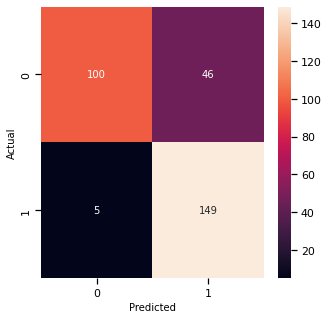

In [94]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

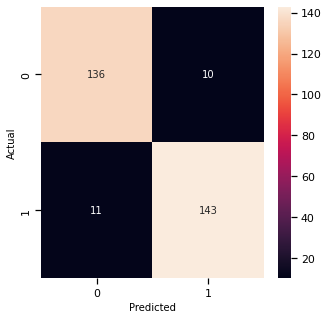

In [95]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

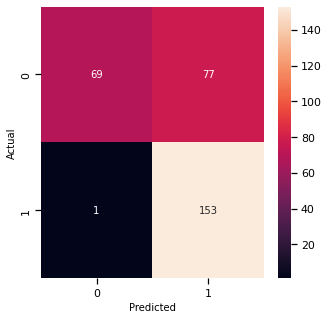

In [96]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, ada.predict(X_test)), annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Normalization

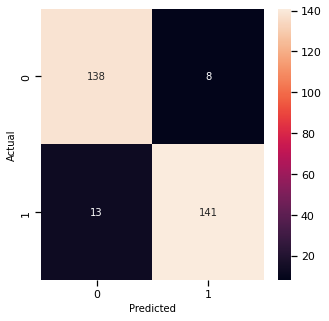

In [97]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test1, rfc.predict(X_test1)), annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

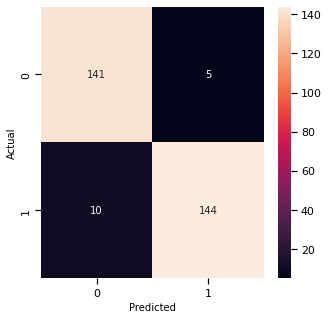

In [98]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test1, lr.predict(X_test1)), annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

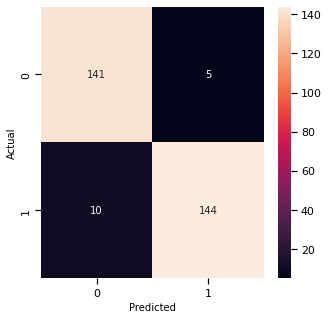

In [99]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test1, ada.predict(X_test1)), annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Our confusion matrix tells us that the total number of accurate predictions is `141 + 144 = 285`. On the other hand, the number of incorrect predictions is `5 + 10 = 15`. We can be satisfied with the prediction accuracy of our model.

It can be concluded that the `ADA Boost` model showed better performances in comparison to the `Logistic Regression` model and `Random Forest` model. The confusion matrix shows us that the 285 predictions have been done correctly and that there are only 15 incorrect predictions. Additionally, ADA Boost accuracy with Normalization is better by about 2% in comparison to the Logistic Regression model with Standardization .

### FEATURE IMPORTANT

In [100]:
arr_feature_importances = ada.feature_importances_
arr_feature_names = X_train1.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
54,Daily Time Spent on Site,0.24
57,Daily Internet Usage,0.20
56,Area Income,0.20
55,Age,0.12
59,Day,0.08
...,...,...
11,city_Jakarta Pusat,0.00
32,province_Jawa Barat,0.00
33,province_Jawa Tengah,0.00
34,province_Jawa Timur,0.00


In [101]:
df_feature = df_all_features.head(10)

Text(0.5, 1.0, 'Feature Importance')

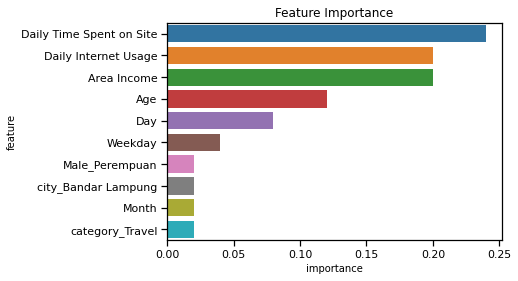

In [102]:
sns.barplot(x=df_feature['importance'], y=df_feature['feature'])
plt.title('Feature Importance')

3 most important feature which affect in `Clicked on Ad`, first is `Daily Time Spent on Site`. second is `Daily Internet Usage` and the third is`Area Income`. `Daily Time Spent on Site` is the main reason customer clicked on ad or not, the more customer spent time on the site, less they are clicked on ad. the same with `Daily Internet Usage` more times customer spent their time on internet, more seldom they clicked on ads. and `Area Income` is the same with the both feature important before, customer with higher `Area Income` less to Clicked on Ad. But, older people are clicked on ad more than younger.

## __BUSINESS SIMULATION__

In [103]:
bisnis = df.copy()

In [123]:
bisnis.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Month,Day,Weekday,Hour,age_group
0,68.95,35,432837300.0,256.09,Perempuan,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,27,6,0,New Worker
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Denpasar,Bali,Food,4,4,0,1,New Worker
2,69.47,26,418501580.0,236.50,Perempuan,No,Surabaya,Jawa Timur,Electronic,3,13,6,20,New Worker
3,74.15,29,383643260.0,245.89,Laki-Laki,No,Batam,Kepulauan Riau,House,1,10,6,2,New Worker
4,68.37,35,517229930.0,225.58,Perempuan,No,Medan,Sumatra Utara,Finance,6,3,4,3,New Worker


we will grouped `Age` with several category:
- < 15 = children
- 15-25 = young
- 26-35 = new worker
- 36-45 = professional worker
- 46-55 = veteran worker
- 56-65 = Retire 

In [105]:

def group(x):
  if x['Age']>54:
    result = 'Retire'
  elif x['Age']>45 and x['Age']<=54:
    result = 'Veteran Worker'
  elif x['Age']>35 and x['Age']<=45:
    result = 'Professional Worker'
  elif x['Age']>25 and x['Age']<=35:
    result = 'New Worker'
  elif x['Age']>15 and x['Age']<=25:
    result = 'Young'
  return result
bisnis['age_group'] = bisnis.apply(lambda x: group(x),axis=1)

In [108]:
bisnis[['Age','age_group']].head(10)

,Age,age_group
0,35,New Worker
1,31,New Worker
2,26,New Worker
3,29,New Worker
4,35,New Worker
5,23,Young
6,33,New Worker
7,48,Veteran Worker
8,30,New Worker
9,20,Young


In [109]:

orders = ["Young","New Worker","Professional Worker","Veteran Worker","Retire"]
bisnis['age_group'] = pd.Categorical(bisnis['age_group'], categories=orders, ordered=True)

In [110]:
bisnis.groupby(['age_group']).agg({'Age':'count'}).reset_index()

,age_group,Age
0,Young,98
1,New Worker,424
2,Professional Worker,321
3,Veteran Worker,131
4,Retire,26


In [160]:

bisnis_1 = bisnis.groupby(['Clicked on Ad','age_group']).agg({'Daily Internet Usage':['count','mean'],
                                                       'Daily Time Spent on Site':['mean']}).reset_index()
bisnis_1.columns=['is_click','age_group','total','avg_daily_internet_usage','avg_time_spent']
bisnis_1 = bisnis_1.sort_values(['is_click','avg_daily_internet_usage'],ascending=[False,False])
bisnis_1

,is_click,age_group,total,avg_daily_internet_usage,avg_time_spent
5,Yes,Young,21,161.460476,61.531905
9,Yes,Retire,26,158.625769,60.082289
6,Yes,New Worker,131,151.128043,53.483813
8,Yes,Veteran Worker,117,146.557179,52.041791
7,Yes,Professional Worker,205,138.288882,52.101995
3,No,Veteran Worker,14,226.482401,76.118571
2,No,Professional Worker,116,217.061121,78.637061
1,No,New Worker,293,215.101892,77.073301
0,No,Young,77,203.633730,71.805195
4,No,Retire,0,NaN,NaN


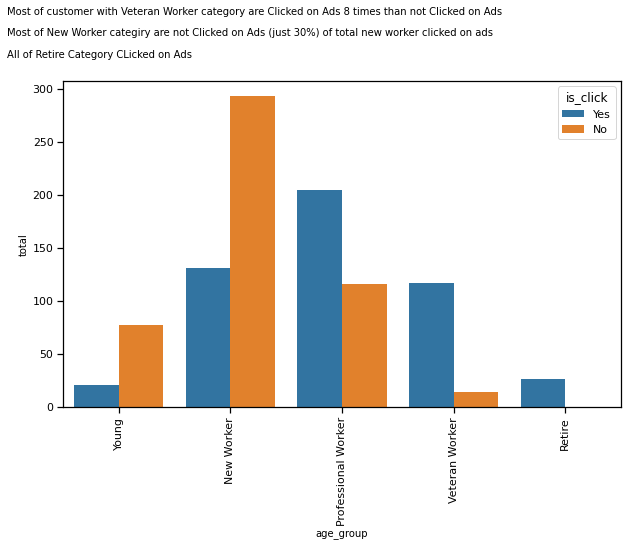

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(x='age_group',y='total', hue='is_click',data=bisnis_1)
plt.text(x=-1,y=370,s='Most of customer with Veteran Worker category are Clicked on Ads 8 times than not Clicked on Ads')
plt.text(x=-1,y=350,s='Most of New Worker categiry are not Clicked on Ads (just 30%) of total new worker clicked on ads')
plt.text(x=-1,y=330,s='All of Retire Category CLicked on Ads')
plt.xticks(rotation=90)
plt.show()

In [115]:

bisnis_2 = bisnis.groupby(['Clicked on Ad','age_group','category']).agg({'Daily Internet Usage':['count','mean'],
                                                       'Daily Time Spent on Site':['mean']}).reset_index()
bisnis_2.columns=['is_click','age_group','category','total','avg_daily_internet_usage','avg_time_spent']
bisnis_2 = bisnis_2.sort_values(['is_click','total'],ascending=[True,False])
bisnis_2[bisnis_2['is_click']=='Yes']

,is_click,age_group,category,total,avg_daily_internet_usage,avg_time_spent
76,Yes,Professional Worker,Health,24,144.375000,49.877917
71,Yes,Professional Worker,Electronic,22,142.938636,48.672273
77,Yes,Professional Worker,House,22,138.920909,53.214091
79,Yes,Professional Worker,Travel,22,141.769875,52.883615
72,Yes,Professional Worker,Fashion,21,130.128095,57.686644
73,Yes,Professional Worker,Finance,20,129.515500,47.873000
70,Yes,Professional Worker,Bank,19,138.211053,54.749474
74,Yes,Professional Worker,Food,19,140.666506,55.326842
78,Yes,Professional Worker,Otomotif,19,137.040526,52.081053
75,Yes,Professional Worker,Furniture,17,137.584118,48.766471


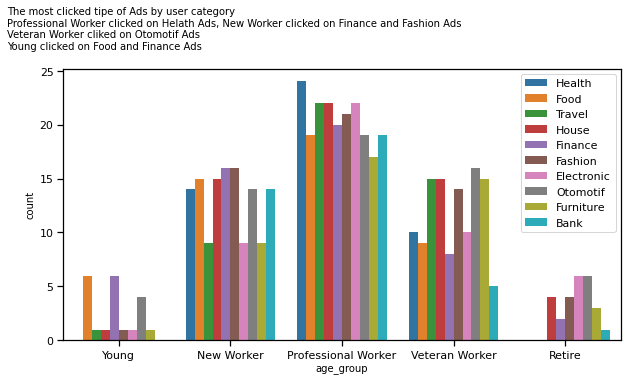

In [118]:

plt.figure(figsize=(10,5))
sns.countplot(x='age_group', hue='category',data=bisnis[bisnis['Clicked on Ad']=='Yes'])
plt.text(x=-1,y=27,s='The most clicked tipe of Ads by user category\nProfessional Worker clicked on Helath Ads, New Worker clicked on Finance and Fashion Ads\nVeteran Worker cliked on Otomotif Ads\nYoung clicked on Food and Finance Ads')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [184]:

bisnis_2 = bisnis.groupby(['Month','Clicked on Ad']).agg({'Age':'count'}).rename(columns={'Age':'Total_Clicked'}).reset_index()
#bisnis_3 = bisnis_2.merge(bisnis_1,on='Month')
bisnis_3 = bisnis_2.groupby(['Month']).agg({'Total_Clicked':'sum'}).rename(columns={'Total_Clicked': 'Total'}).reset_index()
bisnis_3

,Month,Total
0,1,147
1,2,160
2,3,156
3,4,147
4,5,147
5,6,142
6,7,101


In [186]:
bisnis_4 = bisnis_3.merge(bisnis_2, on ='Month')
bisnis_4['ConventionRate(%)'] = round(bisnis_4['Total_Clicked']*100/bisnis_4['Total'],3)

bisnis_5 = bisnis_4[bisnis_4['Clicked on Ad']=='Yes']
bisnis_5

,Month,Total,Clicked on Ad,Total_Clicked,ConventionRate(%)
1,1,147,Yes,69,46.939
3,2,160,Yes,83,51.875
5,3,156,Yes,74,47.436
7,4,147,Yes,74,50.340
9,5,147,Yes,79,53.741
11,6,142,Yes,71,50.000
13,7,101,Yes,50,49.505


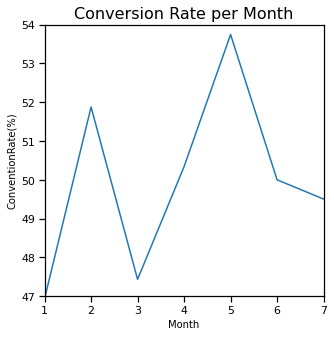

In [188]:

plt.figure(figsize=(5,5))
sns.lineplot(x=bisnis_5['Month'],y=bisnis_5['ConventionRate(%)'])
plt.title('Conversion Rate per Month',fontsize=16)
plt.ylim((47,54))
plt.xlim((1,7))
plt.xticks(range(1,8))
plt.show()

In [189]:
bisnis_5['ConventionRate(%)'].mean()

49.97657142857143

so, by the model we know that convention rate that we will gain for this Ad by the model is `49.97%`

### RECOMMENDATION

3 most important feature which affect in `Clicked on Ad`, first is `Daily Time Spent on Site`. second is `Daily Internet Usage` and the third is`Area Income`. `Daily Time Spent on Site` is the main reason customer clicked on ad or not, the more customer spent time on the site, less they are clicked on ad. the same with `Daily Internet Usage` more times customer spent their time on internet, more seldom they clicked on ads. and `Area Income` is the same with the both feature important before, customer with higher `Area Income` less to Clicked on Ad. But, older people are clicked on ad more than younger.

The most clicked tipe of Ads by user category
- Professional Worker clicked on Helath Ads, 
- New Worker clicked on Finance and Fashion Ads
- Veteran Worker cliked on Otomotif Ads
- Young clicked on Food and Finance Ads

based on the result and the insight we get from the data, i have some recomendation for our business:
1. we can devide types of ads we give to customer/user by their Age. example: for user in category Young we will provide Food and Finance Ads
2. Our target Ad will more intense to Older Customer/User.
3. Time when Ads more clicked is in 8-10 am. We should put more Ads on that time. 